In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
!pip install xlrd

In [3]:
df = pd.read_excel('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/Regression/Multiple Regression/Data/ca11-03homes.xls',sheet_name='Sheet1')

In [4]:
df.head()

,Obs,Price,SqFt,BedRooms,Baths,Garage,Zip
0,1,52900,932,1,1.0,0,4
1,2,61500,780,3,1.0,0,5
2,3,62000,1500,3,1.0,0,9
3,4,62900,760,2,1.0,0,4
4,5,64900,900,2,1.0,0,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Obs       504 non-null    int64  
 1   Price     504 non-null    int64  
 2   SqFt      504 non-null    int64  
 3   BedRooms  504 non-null    int64  
 4   Baths     504 non-null    float64
 5   Garage    504 non-null    int64  
 6   Zip       504 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.7 KB


- No missing values in these dataset.
- less important feature like-Obs,Zip so drop the columns

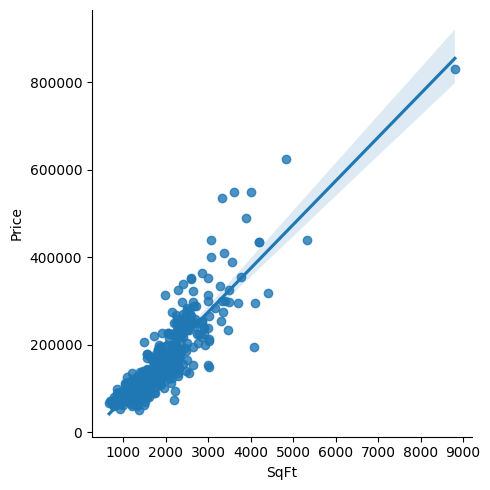

In [6]:
sns.lmplot(data=df,x = 'SqFt',y='Price')

- Linear Relationship

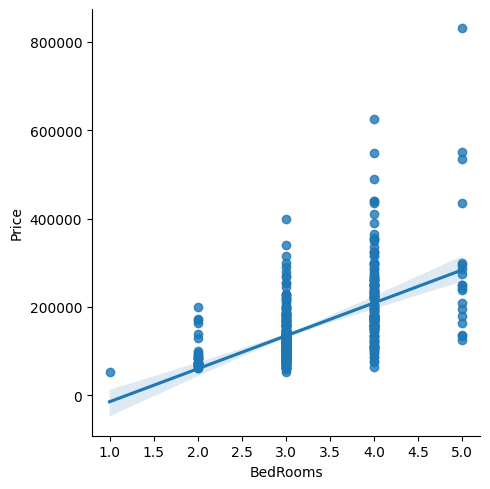

In [7]:
sns.lmplot(data=df,x ='BedRooms',y='Price')

In [8]:
df['BedRooms'].value_counts()

BedRooms
3    303
4    150
2     31
5     19
1      1
Name: count, dtype: int64

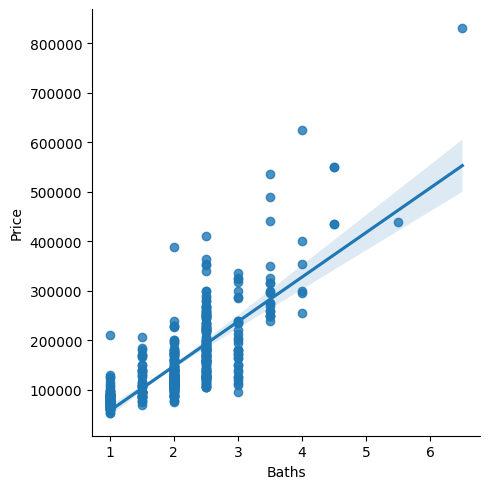

In [9]:
sns.lmplot(data=df,x = 'Baths',y='Price')

In [10]:
df['Baths'].value_counts()

Baths
2.0    166
2.5    144
1.0     83
1.5     46
3.0     34
3.5     19
4.0      6
4.5      4
5.5      1
6.5      1
Name: count, dtype: int64

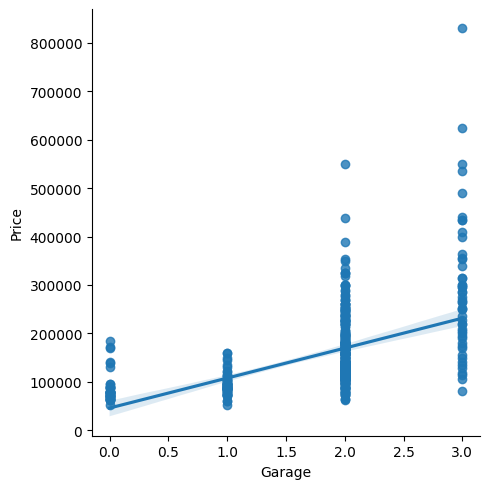

In [11]:
sns.lmplot(data=df,x = 'Garage',y='Price')

In [12]:
df['Garage'].value_counts()

Garage
2    351
1     60
3     50
0     43
Name: count, dtype: int64

- Three boxplots representing the relation between BedRooms and Price,Baths and Price,Garage and Price.These boxplots are useful to find out 
any outliers are present in the data.

<Axes: xlabel='BedRooms', ylabel='Price'>

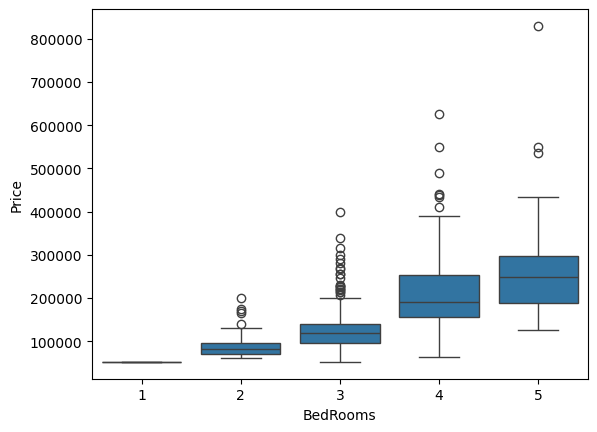

In [13]:
sns.boxplot(data=df,x='BedRooms',y='Price')

<Axes: xlabel='Baths', ylabel='Price'>

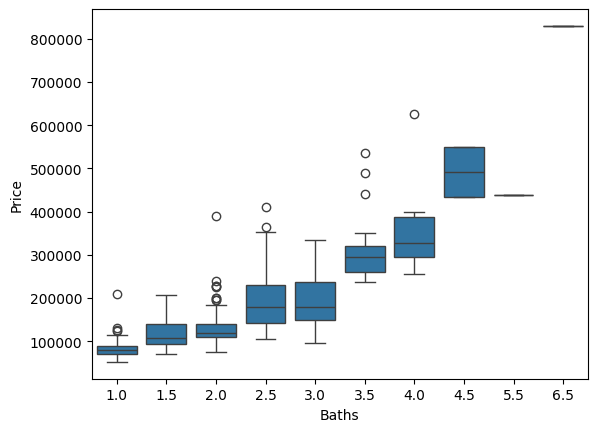

In [14]:
sns.boxplot(data=df,x='Baths',y='Price')

<Axes: xlabel='Garage', ylabel='Price'>

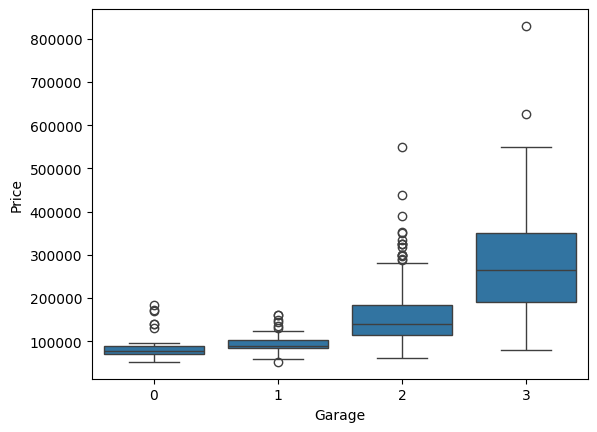

In [15]:
sns.boxplot(data=df,x='Garage',y='Price')

- When we observe above plots,we can see some data points above the boxes.These data points are nothing but abnormal values in Price and called 'Outliers'.
- We can find out those datapoints using IQR(Inter Quartile Range) method:

In [16]:
# Calculate iqr
q3 = df['Price'].quantile(0.75)
q1 = df['Price'].quantile(0.25)
iqr = q3 - q1

# Calculate lower and upper limits for iqr
# any value above ul or ll will become outliers
ul = q3 + (1.5 * iqr)
ll = q1 - (1.5 * iqr)

# Price should not be more than ul and less than ll
# If it is so,then it become outlier
# df = df[(df['Price'] < ul) & (df['Price'] > ll)]
upper = np.where(df['Price'] >=ul)
lower = np.where(df['Price'] <=ll)

- Once we find the outliers,we can delete those rows with outlier values using drop() method of the data frame.

In [17]:
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)

In [18]:
df.head()

,Obs,Price,SqFt,BedRooms,Baths,Garage,Zip
0,1,52900,932,1,1.0,0,4
1,2,61500,780,3,1.0,0,5
2,3,62000,1500,3,1.0,0,9
3,4,62900,760,2,1.0,0,4
4,5,64900,900,2,1.0,0,4


In [19]:
x = df.iloc[:,2:6].values
y = df.iloc[:,1].values

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = reg.predict(x_test)
y_pred

array([244768.64946208, 136035.20507134, 100620.88155276,  80807.61549519,
       112278.75133729, 107212.67128127, 125134.80242484, 108582.6678189 ,
       127579.21048901,  54313.82774748, 182474.02299822, 199410.08316585,
       146296.39223749, 173706.01931969, 186500.41593739, 230435.36955506,
        72673.89200472, 179577.92537705, 240100.12942138, 134326.90476781,
       168959.74270937, 123249.11620391, 169351.97602134, 218205.02148396,
        71153.23961425, 193760.94084228, 101448.06693149, 154059.43320884,
       140639.3335747 , 117592.05754112, 171221.43815278, 148251.91868882,
       222465.6669497 , 123528.47712553,  77175.92351415, 178877.05542685,
        98042.11973114, 190408.60978285, 128879.36679624,  73893.43268512,
       127820.86595404, 178527.85427482, 110188.99311821, 258492.45044215,
        87415.62931319, 213378.12924681, 186559.48077137, 110342.1166172 ,
       185310.2729633 , 123109.4357431 , 178675.45107485,  69283.9774784 ,
       168618.45789656, 1

In [24]:
r_score = r2_score(y_test,y_pred)
print('Model Accuracy is:',r_score)

Model Accuracy is: 0.7462190571925384


In [25]:
model_score = reg.score(x_test,y_test)
print("Model Score is:",model_score)

Model Score is: 0.7462190571925384


In [26]:
reg.predict([[1500,3,2,4]])

array([141192.72871458])

In [27]:
reg.predict([[1500,3,2,4],[2500,4,0,0]])

array([141192.72871458, 149474.00502127])

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 906009311.768162


In [29]:
from sklearn.metrics import r2_score

def adjusted_r2(r2, n, p):
    """
    Calculate Adjusted R-squared.
    
    Parameters:
    - r2: R-squared value.
    - n: Number of data points (observations).
    - p: Number of independent variables (predictors).
    
    Returns:
    - Adjusted R-squared value.
    """
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Example usage
# Sample data
y_true = y_test
y_pred1 = y_pred

# Calculate R-squared
r2 = r2_score(y_true, y_pred1)

# Number of observations and predictors
n = len(y_true)  # number of data points
p = 1  # number of predictors (for simple linear regression)

# Calculate Adjusted R-squared
adj_r2 = adjusted_r2(r2, n, p)

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")

R-squared: 0.7462190571925384
Adjusted R-squared: 0.7444318674544577


In [30]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 0.15988230757293223


In [31]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 30099.98856757527
